# 공분산과 상관계수

In [2]:
import scipy as sp
from sklearn.datasets import load_iris
X = load_iris().data
x1 = X[:, 0]  # 꽃받침의 길이
x2 = X[:, 1]  # 꽃받침의 폭
x3 = X[:, 2]  # 꽃잎의 길이
x4 = X[:, 3]  # 꽃잎의 폭
sp.stats.pearsonr(x1, x3)[0]

0.8717537758865833

In [5]:
# 7.5.1
sp.stats.pearsonr(x1, x2)[0], sp.stats.pearsonr(x3, x4)[0], sp.stats.pearsonr(x2, x4)[0]

(-0.11756978413300208, 0.9628654314027963, -0.3661259325364391)

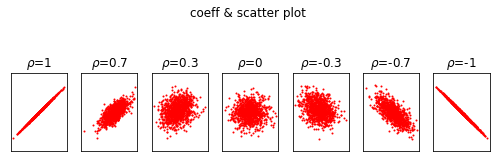

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
corrs = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(corrs), 2))
for i, r in enumerate(corrs):
    x, y = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], 1000).T
    plt.subplot(1, len(corrs), i + 1)
    plt.plot(x, y, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title(r"$\rho$={}".format(r))

plt.suptitle("coeff & scatter plot", y=1.1)
plt.tight_layout()
plt.show()

In [8]:
np.random.seed(0)

x1 = np.random.normal(size = 10)
x2 = np.random.normal(size = 10)

In [9]:
x1

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [10]:
x2

array([ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574])

In [11]:
sp.stats.pearsonr(x1, x2)[0]

0.07172529242772137

In [12]:
x1 = np.random.normal(size = 10000)
x2 = np.random.normal(size = 10000)
sp.stats.pearsonr(x1, x2)[0]

-0.007638623904848809

C:\Users\admin\AppData\Local\Temp\ipykernel_21264\3722879735.py:25: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  np.array([-1, 1])[np.random.random_integers(0, 1, size=n)]


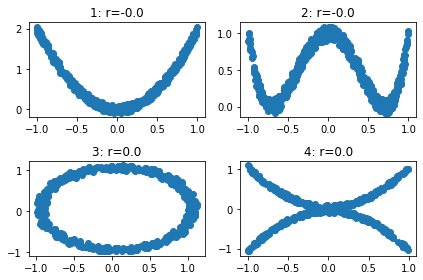

In [13]:
n = 500
np.random.seed(1)
plt.subplot(221)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1**2 + np.random.uniform(-0.1, 0.1, n)
plt.scatter(x1, y1)
r1 = sp.stats.pearsonr(x1, y1)[0]
plt.title(r"1: r={:3.1f}".format(r1))
plt.subplot(222)
x2 = np.random.uniform(-1, 1, n)
y2 = 4*(x2**2-0.5)**2 + 0.1 * np.random.uniform(-1, 1, n)
plt.scatter(x2, y2)
r2 = sp.stats.pearsonr(x2, y2)[0]
plt.title(r"2: r={:3.1f}".format(r2))
plt.subplot(223)
x3 = np.random.uniform(-1, 1, n)
y3 = np.cos(x3 * np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3 * np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
r3 = sp.stats.pearsonr(x3, y3)[0]
plt.title(r"3: r={:3.1f}".format(r3))
plt.subplot(224)
x4 = np.random.uniform(-1, 1, n)
y4 = (x4**2 + np.random.uniform(0, 0.1, n)) * \
    np.array([-1, 1])[np.random.random_integers(0, 1, size=n)]
plt.scatter(x4, y4)
r4 = sp.stats.pearsonr(x4, y4)[0]
plt.title(r"4: r={:3.1f}".format(r4))
plt.tight_layout()
plt.show()

In [15]:
! pip install statsmodels

In [22]:
import statsmodels.api as sm

data = sm.datasets.get_rdataset("anscombe")
df = data.data
df[["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]]

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


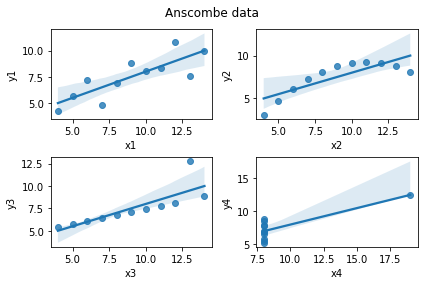

In [24]:
import seaborn as sns

plt.subplot(221)
sns.regplot(x="x1", y="y1", data=df)
plt.subplot(222)
sns.regplot(x="x2", y="y2", data=df)
plt.subplot(223)
sns.regplot(x="x3", y="y3", data=df)
plt.subplot(224)
sns.regplot(x="x4", y="y4", data=df)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Anscombe data")
plt.show()

In [26]:
# 7.5.4

np.cov(X.T, ddof = 0)

array([[ 0.68112222, -0.04215111,  1.26582   ,  0.51282889],
       [-0.04215111,  0.18871289, -0.32745867, -0.12082844],
       [ 1.26582   , -0.32745867,  3.09550267,  1.286972  ],
       [ 0.51282889, -0.12082844,  1.286972  ,  0.57713289]])

In [29]:
np.cov(X, ddof = 0)

array([[3.5625  , 3.31625 , 3.265   , ..., 2.18625 , 1.85625 , 1.95    ],
       [3.31625 , 3.111875, 3.04125 , ..., 2.216875, 1.878125, 1.97125 ],
       [3.265   , 3.04125 , 2.9925  , ..., 2.01625 , 1.71125 , 1.7975  ],
       ...,
       [2.18625 , 2.216875, 2.01625 , ..., 3.141875, 2.738125, 2.87625 ],
       [1.85625 , 1.878125, 1.71125 , ..., 2.738125, 2.406875, 2.53125 ],
       [1.95    , 1.97125 , 1.7975  , ..., 2.87625 , 2.53125 , 2.6625  ]])